## Neo4j
### Exercices Chapitre 4

In [ ]:
import neo4j
import py2neo
from neo4j import GraphDatabase
import random
import json


1. You will continue to work on the MCU network for a while. Who are the 10 fastest in the MCU ? Are they related to each other ?


In [2]:

graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="mcu")

query = """MATCH (n:Superhero)
WHERE (n.Speed) IS NOT NULL
RETURN n.name, n.Speed
ORDER BY n.Speed DESC
LIMIT 10"""

results = graph.run(query)

for record in results:
    print(record)

'Black Bolt'	100
'Stardust'	100
'Quicksilver'	100
'Nova'	100
'Thor'	92
'Silver Surfer'	84
'Galactus'	83
'Dormammu'	83
'Ego'	83
'Northstar'	83


Are they related to each other ?

In [3]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="mcu")

query = """MATCH (n:Superhero)-[r]-(m:Superhero)
WHERE n.name IN ['Black Bolt', 'Stardust', 'Quicksilver', 'Nova', 'Thor', 'Silver Surfer', 'Galactus', 'Dormammu', 'Ego', 'Northstar']
AND m.name IN ['Black Bolt', 'Stardust', 'Quicksilver', 'Nova', 'Thor', 'Silver Surfer', 'Galactus', 'Dormammu', 'Ego', 'Northstar']
RETURN n.name, m.name"""

results = graph.run(query)
for record in results:
    print(record)

'Ego'	'Galactus'
'Dormammu'	'Galactus'
'Black Bolt'	'Galactus'
'Northstar'	'Galactus'
'Nova'	'Galactus'
'Stardust'	'Galactus'
'Silver Surfer'	'Galactus'
'Quicksilver'	'Galactus'
'Thor'	'Galactus'
'Ego'	'Silver Surfer'
'Nova'	'Silver Surfer'
'Quicksilver'	'Silver Surfer'
'Black Bolt'	'Silver Surfer'
'Galactus'	'Silver Surfer'
'Dormammu'	'Silver Surfer'
'Stardust'	'Silver Surfer'
'Thor'	'Silver Surfer'
'Northstar'	'Thor'
'Ego'	'Thor'
'Silver Surfer'	'Thor'
'Nova'	'Thor'
'Black Bolt'	'Thor'
'Galactus'	'Thor'
'Quicksilver'	'Thor'
'Dormammu'	'Thor'
'Dormammu'	'Quicksilver'
'Ego'	'Quicksilver'
'Nova'	'Quicksilver'
'Galactus'	'Quicksilver'
'Black Bolt'	'Quicksilver'
'Northstar'	'Quicksilver'
'Silver Surfer'	'Quicksilver'
'Thor'	'Quicksilver'
'Quicksilver'	'Dormammu'
'Galactus'	'Dormammu'
'Thor'	'Dormammu'
'Silver Surfer'	'Dormammu'
'Galactus'	'Ego'
'Thor'	'Ego'
'Nova'	'Ego'
'Silver Surfer'	'Ego'
'Quicksilver'	'Ego'
'Black Bolt'	'Nova'
'Ego'	'Nova'
'Galactus'	'Nova'
'Silver Surfer'	'Nova'
'Qui

2. How many have collaborated atleast more than 10 times with another superhero?


In [72]:
query = """MATCH (a:Superhero)-[r:RELATION]-(b:Superhero)
WHERE r.n_collab > 10
WITH a
MATCH (a)-[r:RELATION]-(b:Superhero)
WHERE r.n_collab > 10
RETURN COUNT(DISTINCT a)"""

results = graph.run(query).evaluate()
print(results)



528


Il y a 528 superhéros qui ont collaboré plus de 10 fois avec d'autres superhéros.

3. Did the weakest of the MCU collaborated with the strongest ?


In [5]:
query_weakest = """MATCH (n:Superhero)
WHERE (n.Total) IS NOT NULL
RETURN n.name
ORDER BY n.Total
LIMIT 1"""
result_weakest = graph.run(query_weakest).evaluate()

query_strongest = """MATCH (n:Superhero)
WHERE (n.Total) IS NOT NULL
RETURN n.name
ORDER BY n.Total DESC
LIMIT 1"""
result_strongest = graph.run(query_strongest).evaluate()

query_relation = f"""MATCH (a:Superhero {{name: "{result_weakest}"}})-[r:RELATION]-(b:Superhero {{name: "{result_strongest}"}})
RETURN COUNT(r)"""
result_relation = graph.run(query_relation).evaluate()

if result_relation > 0:
    print(f"{result_weakest} a collaboré avec {result_strongest}")
else:
    print(f"{result_weakest} n'a pas collaboré avec {result_strongest}")


Lady Deathstrike n'a pas collaboré avec Stardust


4. Give a stats that interests you !

In [6]:
query = """MATCH (n:Superhero)
WHERE (n.Strength) IS NOT NULL
RETURN n.name, n.Strength
ORDER BY n.Strength DESC
LIMIT 10"""

results = graph.run(query)

for record in results:
    print(record)



'Apocalypse'	100
'Juggernaut'	100
'Thor'	100
'Wonder Man'	100
'Hercules'	100
'Silver Surfer'	100
'Galactus'	100
'Hulk'	100
'Thanos'	100
'Beyonder'	100


5. Create a new db called "master". Create a graph from the M1 class with name and random age between 20 and 30, Group of 3 that collab (undirected relation).

Je ne connais pas les noms de l'ensmble des personnes dans le master, j'ai donc pris des noms sur le groupe mester de whats'app.

In [15]:

noms = ["Romain", "Céléstin", "abaolbatikh", "Werner", "Valentin", "Carl", "Paul", "Nathan", "Boune", "Adrien",
             "Ines", "Oumy", "Erik", "Julien", "Georgiana", "Huiyue", "SH", "Lath", "InesZ"]
personnes = [py2neo.Node("M1", name=nom, age=random.randint(20, 30)) for nom in noms]

for personne in personnes:
    graph.create(personne)

groupes = []
while len(personnes) >= 3:
    groupe = random.sample(personnes, 3)
    groupes.append(groupe)
    for personne in groupe:
        personnes.remove(personne)

for groupe in groupes:
    for i, j in zip(groupe, groupe[1:] + [groupe[0]]):
        relation = py2neo.Relationship(i, "collab", j)
        graph.create(relation)


6. Get the age for people YOU collaborate with.


In [16]:
query = """MATCH (a:M1 {name:"Paul"})-[:collab]-(b:M1)
RETURN b.name, b.age"""

results = graph.run(query)
print(results)

 b.name | b.age 
--------|-------
 Ines   |    26 
 Carl   |    22 



7. Get nodes with age > 25.

In [17]:
query = """MATCH (a:M1)
WHERE a.age > 25
RETURN a.name, a.age"""

df = graph.run(query).to_data_frame()
print(df)

        a.name  a.age
0       Romain     28
1     Céléstin     26
2  abaolbatikh     27
3       Werner     29
4     Valentin     30
5         Paul     30
6         Ines     26
7       Julien     27
8         Lath     29
9        InesZ     28


In [35]:
from neo4j import GraphDatabase

# Define Neo4j connection parameters
uri = "bolt://localhost:7687"
username = "neo4j"
password = "password_tuts"
name = "arxiv"


def insert_arxiv_collaboration_network():
    driver = GraphDatabase.driver(uri, auth=(username, password))
    session = driver.session(database="arxiv")  

    with open("arxiv_cs-3.txt", "r") as file:
        lines = file.readlines()

        for line in lines:
            authors = line.strip().split(", ")

            for i in range(len(authors)):
                for j in range(i + 1, len(authors)):
                    author1 = authors[i]
                    author2 = authors[j]
                    
                    session.run(
                        """
                        MERGE (a:Author {name: $author1})
                        MERGE (b:Author {name: $author2})
                        CREATE UNIQUE (a)-[:COLLABORATES_WITH]->(b)
                        """,
                        author1=author1, author2=author2
                    )

    session.close()
    driver.close()

if __name__ == "__main__":
    insert_arxiv_collaboration_network()


In [31]:
from py2neo import Graph

# Define Neo4j connection parameters
uri = "bolt://localhost:7687"
username = "neo4j"
password = "password_tuts"

# Function to insert collaboration network into Neo4j
def insert_arxiv_collaboration_network():
    # Connect to Neo4j
    graph = Graph(uri, auth=(username, password))

    # Open the text file
    with open("arxiv_cs-3.txt", "r") as file:
        # Read lines from the file
        lines = file.readlines()

        # Process each line in the file
        for line in lines:
            # Split the line into authors
            authors = line.strip().split(", ")

            # Create nodes for authors and relationships between authors who collaborated on the same paper
            for i in range(len(authors)):
                for j in range(i + 1, len(authors)):
                    author1 = authors[i]
                    author2 = authors[j]
                    
                    # Create same author if same name
                    graph.run(
                        """
                        MERGE (a:Author {name: $author1})
                        MERGE (b:Author {name: $author2})
                        CREATE UNIQUE (a)-[:COLLABORATES_WITH]->(b)
                        """,
                        author1=author1, author2=author2
                    )

if __name__ == "__main__":
    insert_arxiv_collaboration_network()


In [32]:
from py2neo import Graph

# Define Neo4j connection parameters
uri = "bolt://localhost:7687"
username = "neo4j"
password = "password_tuts"
name = "arxiv"

# Function to insert collaboration network into Neo4j
def insert_arxiv_collaboration_network():
    # Connect to Neo4j
    graph = Graph(uri, auth=(username, password))

    # Open the text file
    with open("arxiv_cs-3.txt", "r") as file:
        # Read lines from the file
        lines = file.readlines()

        # Process each line in the file
        for line in lines:
            # Split the line into authors
            authors = line.strip().split(", ")

            # Create nodes for authors and relationships between authors who collaborated on the same paper
            for i in range(len(authors)):
                for j in range(i + 1, len(authors)):
                    author1 = authors[i]
                    author2 = authors[j]
                    
                    # Create same author if same name
                    query = (
                        f"MERGE (a:Author {{name: '{author1}'}}) "
                        f"MERGE (b:Author {{name: '{author2}'}}) "
                        f"CREATE UNIQUE (a)-[:COLLABORATES_WITH]->(b)"
                    )
                    graph.run(query)

if __name__ == "__main__":
    insert_arxiv_collaboration_network()


## Application 3

In [103]:
# Define Neo4j connection parameters
uri = "bolt://localhost:7687"
username = "neo4j"
password = "password_tuts"

def insert_pubmed_collaboration_network():
    driver = GraphDatabase.driver(uri, auth=(username, password))
    session = driver.session(database="pubmed_cleaned.json")

    # Load data from JSON file
    with open("pubmed_cleaned.json", "r") as file:
        data = json.load(file)
            
        session.run(
                        """
                        MERGE (a:Author {name: $author1})
                        MERGE (b:Author {name: $author2})
                        CREATE UNIQUE (a)-[:COLLABORATES_WITH]->(b)
                        """,
                        author1=author1, author2=author2
                    )                    

    session.close()
    driver.close()


In [108]:
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"
username = "neo4j"
password = "password_tuts"

# Function to insert author nodes
def insert_author_nodes(data):
    # Connect to Neo4j
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        for paper in data:
            # Extract authors and affiliations from paper data
            authors = paper["authors"]
            for author_info in authors:
                author_name = author_info["name"]
                affiliations = author_info["affiliations"]
                
                # Check if author node already exists
                result = session.run(
                    "MATCH (a:Author {name: $name}) RETURN a",
                    name=author_name
                )
                if not result.single():
                    # Create author node
                    session.run(
                        "CREATE (a:Author {name: $name, affiliations: $affiliations})",
                        name=author_name,
                        affiliations=affiliations
                    )

    # Close Neo4j connection
    driver.close()


2. How many authors have more than 2 affiliations ?

In [ ]:


uri = "bolt://localhost:7687"
username = "neo4j"
password = "password_tuts"
name = "pubmed"

def count_authors_with_more_than_two_affiliations():
    driver = GraphDatabase.driver(uri, auth=(username, password, name))
    with driver.session() as session:
        result = session.run(
            """
            MATCH (a:Author)
            WHERE size(a.affiliations) > 2
            RETURN count(a) AS authorsWithMoreThanTwoAffiliations
            """
        )
        count = result.single()["authorsWithMoreThanTwoAffiliations"]

    driver.close()

    return count

count = count_authors_with_more_than_two_affiliations()

print(count)


3. Create a density of node degrees. Do you observe a power scale law ? What does it mean ?


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from neo4j import GraphDatabase
import pandas as pd

graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="pubmed")

query1 =  """
MATCH (n)
WITH n, size((n)--()) AS degree
WITH degree, count(*) AS count
RETURN degree, count
ORDER BY degree
"""

results1 = graph.run(query).to_data_frame()

data = pd.DataFrame([dict(record) for record in result])

plt.bar(data["degree"], data["count"])
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Node Degree Distribution')
plt.show()

4. Which country has seen the most international collaboration ?


In [ ]:

from neo4j import GraphDatabase

graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="pubmed")

query2 = """
        // Match authors with affiliations in different countries
        MATCH (a:Author)-[:AFFILIATED_WITH]->(aff1:Affiliation),
        (b:Author)-[:AFFILIATED_WITH]->(aff2:Affiliation)
        WHERE a <> b AND aff1.country <> aff2.country
        // Count the collaborations between authors from different countries
        WITH aff1.country AS country1, aff2.country AS country2, count(*) AS collaborations
        // Aggregate and determine the country with the most collaborations
        RETURN country1, country2, collaborations
        ORDER BY collaborations DESC
        LIMIT 1
        """
        
record = result.single()
country1 = record["country1"]
country2 = record["country2"]
collaborations = record["collaborations"]

# Print the result
print("The countries {country1} and {country2} have the most international collaboration with {collaborations} collaborations.")

5. Who are the top 10 collaborators and what is their affiliation ?


In [ ]:
query = """
MATCH (a:Author)-[:SAME_TITLE]-(:Author)
WITH DISTINCT a, COUNT(DISTINCT id(a)) AS collaborations, COLLECT(DISTINCT a.affiliation) AS affiliations
ORDER BY collaborations DESC
LIMIT 10
RETURN a.name AS Author, affiliations[0] AS Affiliation, collaborations
"""

results2 = graph.run(query).to_data_frame

print(results2)

6. Sandbox : Compter le nombre de papier en économie écris en france

In [ ]:
query = """MATCH (a:Author)-[:WRITTEN]->(m:Paper)
WHERE toLower(m.domain) CONTAINS 'economy' AND a.country = 'France'
RETURN COUNT(DISTINCT m) AS num_papers
        """
results3 = graph.run(query).to_data_frame

print(results3)

## Application 5

In [53]:

import py2neo
import seaborn as sns
import itertools
import pandas as pd
import tqdm
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="twitch")

In [44]:


target = pd.read_csv("FR_target.csv")
target = target.drop_duplicates(subset="id")
target.shape

(6549, 6)

In [45]:
try:
    graph.run("CREATE CONSTRAINT ON (n:Streamer) ASSERT n.id IS UNIQUE")
except:
    print("Constraint already exists")

transaction_list = []
for row in tqdm.tqdm(target.iterrows()):
    id = row[1]["id"]
    days = row[1]["days"]
    mature = row[1]["mature"]
    views= row[1]["views"]
    partner = row[1]["partner"]
    new_id = row[1]["new_id"]
    transaction_list.append({"id": id, "days": days, "mature": mature, "views": views, "partner": partner, "new_id": new_id})
    if len(transaction_list) == 1000:
        transaction = "UNWIND $json as data CREATE (n:Streamer) SET n = data"
        graph.run(transaction, json=transaction_list)
        transaction_list = []
        
graph.run(transaction, json=transaction_list)

pass

Constraint already exists


6549it [00:00, 9509.98it/s] 


In [47]:
edges = pd.read_csv("FR_edges.csv")
edges = edges.drop_duplicates()
edges.shape

(112666, 2)

In [50]:

graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="twitch")

transaction_list = []
transaction = """UNWIND $json as data
    MATCH (a:Streamer),(b:Streamer)
    WHERE a.new_id = data.from AND b.new_id = data.to
    MERGE (a)-[r:RELATION]->(b)
    ON CREATE
    SET r.n_collab = 1
    ON MATCH
    SET r.n_collab = r.n_collab + 1
    """
it = 0
for edge in tqdm.tqdm(edges.groupby(["from"])):
    related_ids = edge[1]["to"]
    for combi in list(itertools.combinations(related_ids, 2)):
        sh1 = combi[0]
        sh2 = combi[1]
        transaction_list.append({"from":sh1,"to":sh2})
        it +=1
        if it % 1000 == 0:
            graph.run(transaction, json=transaction_list)
            transaction_list = []

graph.run(transaction, json=transaction_list)
pass

100%|██████████| 5882/5882 [7:34:50<00:00,  4.64s/it]     


1. Give the IDs of the top 10 streamers that have atleast one collaboration.


In [52]:
query = """ MATCH (n:Streamer)-[r:RELATION]->(m:Streamer)
WITH n, count(r) as collab
WHERE collab >= 1
RETURN n.id as streamer_id, collab
ORDER BY collab DESC
LIMIT 10
  """

results = graph.run(query).to_data_frame()
print(results)

   streamer_id  collab
0    127477789    4326
1     18887776    4196
2     41719107    4140
3    147337432    4112
4     73622058    4071
5     40383341    3853
6     53993547    3801
7     40329398    3776
8     67655739    3571
9     27085209    3559


2. Create a density of node degrees. Do you observe a power scale law ? What does it mean ?


Text(0, 0.5, 'Density of node')

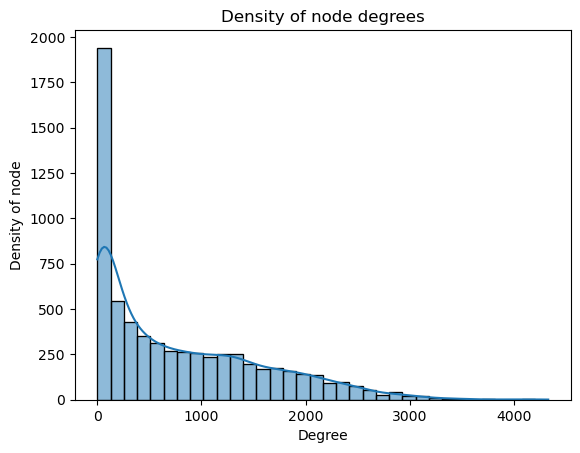

In [59]:
query =  """
MATCH (s)
OPTIONAL MATCH (s)-[:RELATION]->()
WITH s, COUNT(*) AS degree
RETURN degree
"""
data = graph.run(query).to_data_frame()

ax = sns.histplot(data["degree"], kde=True)
ax.set_title("Density of node degrees")
ax.set_xlabel("Degree")
ax.set_ylabel("Density of node")


3. How many streamers has the tag "mature" ?


In [60]:
query = """ MATCH (n:Streamer)
            WHERE n.mature = True
            RETURN count(n) as mature_streamers """

results = graph.run(query).to_data_frame()
print(results)

   mature_streamers
0              2414


4. Is the collaboration correlated to the "mature" tag ?

In [62]:
query = """MATCH (s:Streamer)-[r:RELATION]->()
WITH s.mature AS mature, count(r) AS collab_count
RETURN mature, collab_count
 """

result = graph.run(query).to_data_frame()
corr = result['mature'].corr(result['collab_count'])
print(corr) 

-0.9999999999999999


Le coefficient de coorélation est d'environs -1, ce qui signifie que les streamers qui ont le tag 'mature' n'ont pas tendnace a faire de collaboration, a contrario des streamers sans le tag mature.

5. Do partners collaborate more than non partners ?

In [68]:
query = """ MATCH (n:Streamer)-[r:RELATION]->(m:Streamer)
WHERE n <> m AND n.partner = True AND m.partner = True
RETURN count(r) as collab_p """

result1 = graph.run(query).to_data_frame()
print(result1)

query2 = """ MATCH (n:Streamer)-[r:RELATION]->(m:Streamer)
WHERE n <> m AND n.partner = False AND m.partner = False
RETURN count(r) as collab_np """

result2 = graph.run(query2).to_data_frame()
print(result2)

   collab_p
0     74524
   collab_np
0    4052279


Les partenaire collabores moins que les non partenaires.

6. Sandbox : Give the top 3 streamers with the most views.

In [102]:
graph = py2neo.Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="twitch")
query = """
MATCH (n:Streamer)-[r:RELATION]->(m:Streamer)
WITH n, count(r) as views
WHERE views >= 1
RETURN n.id as streamer_id, views
ORDER BY views DESC
LIMIT 3
"""

results = graph.run(query).to_data_frame()
print(results)

   streamer_id  views
0    127477789   4326
1     18887776   4196
2     41719107   4140


## Application 6

In [78]:

import pandas as pd
from py2neo import Graph, Node, Relationship
from py2neo import NodeMatcher


csv_file = "stack_network_nodes.csv"
data = pd.read_csv(csv_file)

graph = Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="stack")

for index, row in data.iterrows():
    name = row['name']
    group = row['group']
    nodesize = row['nodesize']
    
    node = Node("Node", name=name, group=group, nodesize=nodesize)
    
    graph.create(node)



In [80]:
csv_links_file = "stack_network_links.csv"
links_data = pd.read_csv(csv_links_file)

graph = Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="stack")
node_matcher = NodeMatcher(graph)
node_ids = {node["name"]: node.identity for node in node_matcher.match("Node")}

for index, row in links_data.iterrows():
    source_name = row['source']
    target_name = row['target']
    value = row['value']
    
    source_id = node_ids.get(source_name)
    target_id = node_ids.get(target_name)
    
    if source_id is not None and target_id is not None:
        relation = Relationship(graph.nodes[source_id], "LINKS_TO", graph.nodes[target_id], weight=value)
        
        graph.create(relation)


1. What are the 10 most popular keywords ?


In [97]:
query = """
MATCH (t)
RETURN t.name AS tag, sum(t.nodesize) AS popularity
ORDER BY popularity DESC
LIMIT 10
"""

result = graph.run(query)
for record in result:
    print(f"{record['tag']} : {record['popularity']}")

javascript : 1947.48
java : 1831.9499999999998
python : 1316.01
php : 1083.66
css : 1023.51
c# : 963.39
html : 817.3499999999999
c++ : 804.33
android : 689.58
jquery : 624.87


In [99]:
query = """
MATCH (k1:Node)-[:LINKS_TO]-(k2:Node)
WHERE k1.name < k2.name
RETURN k1.name AS Keyword1, k2.name AS Keyword2, COUNT(*) AS co_occurrences
ORDER BY co_occurrences DESC
LIMIT 10
"""

result = graph.run(query)
for record in result:
    print(f"{record['Keyword1']} and {record['Keyword2']}: {record['co_occurrences']} co-occurrences")

angularjs and css: 2 co-occurrences
bootstrap and css: 2 co-occurrences
ajax and css: 2 co-occurrences
java and spring: 2 co-occurrences
jsp and spring: 2 co-occurrences
hibernate and spring: 2 co-occurrences
java-ee and spring: 2 co-occurrences
maven and spring: 2 co-occurrences
rest and spring: 2 co-occurrences
css and html: 2 co-occurrences


3. How many keywords are in group 1 ?


In [100]:
query = """
MATCH (n:Node)
WHERE n.group = 1
RETURN COUNT(n) AS keyword_count
"""

result = graph.run(query)
keyword_count = result.evaluate()

print(keyword_count)


30


Il y a 30 mots-clés danns le groupe 1.

4. Is the Co-occurence correlated to the "group" of the keyword ?


In [ ]:

graph = Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="stack")

query = """
MATCH (t1:Node)-[r:LINKS_TO]->(t2:Node)
WITH t1.group = t2.group AS same_group, COUNT(*) AS co_occurrences
RETURN 
    SUM(CASE WHEN same_group THEN co_occurrences ELSE 0 END) AS co_occurrences_group,
    SUM(CASE WHEN NOT same_group THEN co_occurrences ELSE 0 END) AS co_occurrences_NONgroup
"""

result = graph.run(query).evaluate()

print("Co-occurrence within the same group:", result['co_occurrences_group'])
print("Co-occurrence outside the same group:", result['co_occurrences_NONgroup'])


5. Sandbox : Show the occurences of "NoSQL" overtime 


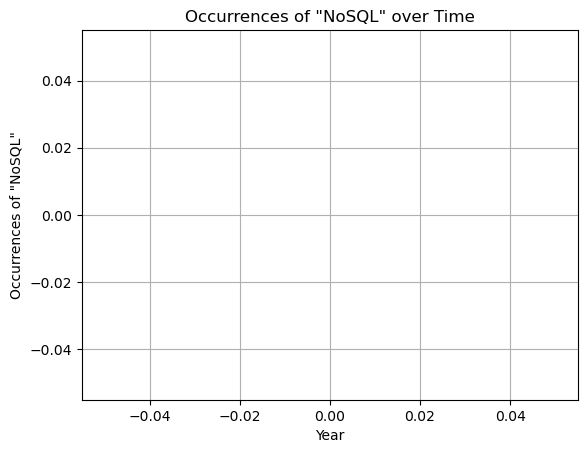

In [93]:
from py2neo import Graph
import matplotlib.pyplot as plt

graph = Graph("bolt://localhost:7687", auth=("neo4j", "password_tuts"), name="stack")

query = """
MATCH (d:Document)
WHERE d.text CONTAINS 'NoSQL'
RETURN date(d.date).year AS year, count(*) AS occurrences
ORDER BY year
"""

result = graph.run(query)

years = []
occurrences = []
for record in result:
    years.append(record['year'])
    occurrences.append(record['occurrences'])

plt.plot(years, occurrences, marker='o')
plt.xlabel('Year')
plt.ylabel('Occurrences of "NoSQL"')
plt.title('Occurrences of "NoSQL" over Time')
plt.grid(True)
plt.show()


Il y a un problème d'output pour cette question